In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ratings = pd.read_csv('/home/jovyan/work/Data-Small/ratings.csv', sep= ',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies = pd.read_csv('/home/jovyan/work/Data-Small/movies.csv', sep= ',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


POURCENTAGE DE FILMS PAR GENRE

In [ ]:
#on transforme les string en listes
movies['genres'] = movies['genres'].apply(lambda x : x.split('|')) 


In [ ]:
#on cree autant de lignes que d'elements contenus dans les listes 
#(une liste par ligne)
genres = movies['genres'].explode()

In [ ]:
movies['genres']

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [ ]:
genres

0       Adventure
0       Animation
0        Children
0          Comedy
0         Fantasy
          ...    
9738      Fantasy
9739        Drama
9740       Action
9740    Animation
9741       Comedy
Name: genres, Length: 22084, dtype: object

In [ ]:
liste_genres = list(genres.unique())
liste_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [ ]:
#on retablit la colonne genres
movies['genres'] = movies['genres'].apply(lambda x : '|'.join(x)) 
movies['genres']

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

In [ ]:
#onregarde le nombre de films associé à chaque genre

liste_nombre = []
for genre in liste_genres:
    nb_films = movies[movies['genres'].str.contains(genre)].count()['movieId']
    print('{} films correspondent au genre {}.'.format(nb_films, genre))
    liste_nombre.append(nb_films)

1263 films correspondent au genre Adventure.
611 films correspondent au genre Animation.
664 films correspondent au genre Children.
3756 films correspondent au genre Comedy.
779 films correspondent au genre Fantasy.
1596 films correspondent au genre Romance.
4361 films correspondent au genre Drama.
1828 films correspondent au genre Action.
1199 films correspondent au genre Crime.
1894 films correspondent au genre Thriller.
978 films correspondent au genre Horror.
573 films correspondent au genre Mystery.
980 films correspondent au genre Sci-Fi.
382 films correspondent au genre War.
334 films correspondent au genre Musical.
440 films correspondent au genre Documentary.
158 films correspondent au genre IMAX.
167 films correspondent au genre Western.
87 films correspondent au genre Film-Noir.
34 films correspondent au genre (no genres listed).
/opt/venv/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.

In [ ]:
#pourcentage de chaque genre
liste_genres
liste_nombre

liste_perc = []

for i in range(len(liste_genres)):
    perc = liste_nombre[i]*100 / sum(liste_nombre)
    print('{}% des films correspondent au genre {}.'.format(round(perc, 2),liste_genres[i]))
    liste_perc.append(perc)

5.72% des films correspondent au genre Adventure.
2.77% des films correspondent au genre Animation.
3.01% des films correspondent au genre Children.
17.01% des films correspondent au genre Comedy.
3.53% des films correspondent au genre Fantasy.
7.23% des films correspondent au genre Romance.
19.75% des films correspondent au genre Drama.
8.28% des films correspondent au genre Action.
5.43% des films correspondent au genre Crime.
8.58% des films correspondent au genre Thriller.
4.43% des films correspondent au genre Horror.
2.59% des films correspondent au genre Mystery.
4.44% des films correspondent au genre Sci-Fi.
1.73% des films correspondent au genre War.
1.51% des films correspondent au genre Musical.
1.99% des films correspondent au genre Documentary.
0.72% des films correspondent au genre IMAX.
0.76% des films correspondent au genre Western.
0.39% des films correspondent au genre Film-Noir.
0.15% des films correspondent au genre (no genres listed).


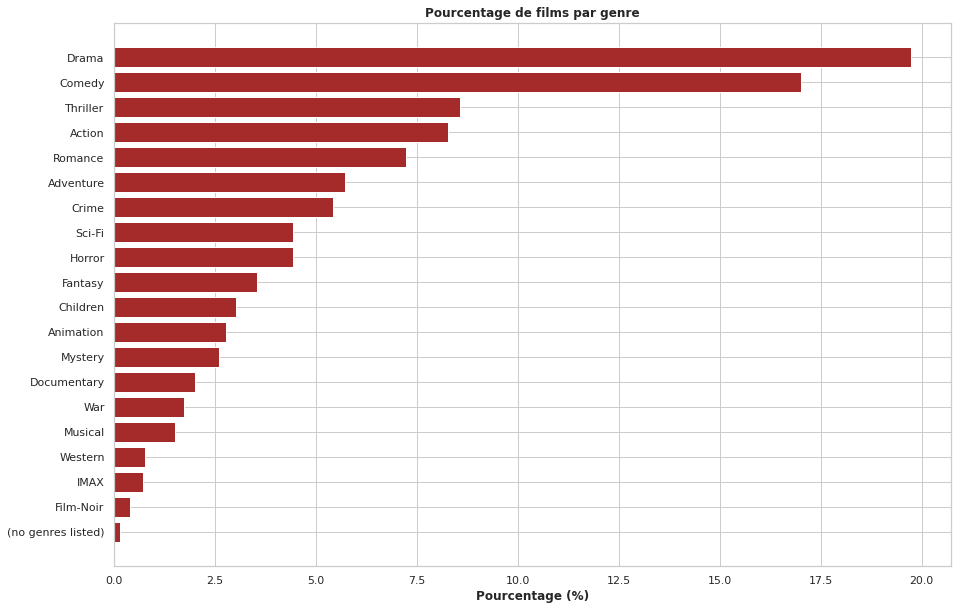

In [ ]:
#visualisation du nombre de films par genre
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15,10))

sns.set_theme(style="whitegrid")

height = liste_perc
bars = liste_genres

#tri de la liste height afin d'afficher les valeurs de la plus grande a la plus petite
unsorted_list = [(height, bars) for bars, height in zip(bars, height)]
sorted_list = sorted(unsorted_list)

bars_sorted = []
height_sorted = []

for i in sorted_list:
    bars_sorted += [i[1]]
    height_sorted += [i[0]]

graph = plt.subplot(111)
y_pos = np.arange(len(bars_sorted))
 
# graph
plt.barh(y_pos, height_sorted, color = 'brown' )
 
# legendes, titre
plt.yticks(y_pos, bars_sorted)
plt.xlabel('Pourcentage (%)',fontweight='bold')
plt.title('Pourcentage de films par genre',fontweight='bold')


#plt.show()
plt.savefig('viz.png')


In [ ]:
len(ratings['movieId'].unique())

9724

MOYENNE PAR GENRE

In [ ]:
#merge de movies et ratings

movies_ratings = pd.merge(ratings, movies, how = 'left' , left_on = 'movieId', right_on = 'movieId')
movies_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [ ]:
len(movies_ratings['movieId'].unique())

9724

In [ ]:
len(movies_ratings['title'].unique())

9719

In [ ]:
movies_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
movies_ratings.groupby('movieId').mean()['rating']

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [ ]:
len(movies_ratings.groupby('movieId').mean()['rating'])

9724

In [ ]:
mean_rating = pd.DataFrame(data=round(movies_ratings.groupby('movieId').mean()['rating'],2))
mean_rating

,rating
movieId,
1,3.92
2,3.43
3,3.26
4,2.36
5,3.07
...,...
193581,4.00
193583,3.50
193585,3.50


In [ ]:
mean_rating['movieId'] = mean_rating.index
mean_rating

,rating,movieId
movieId,,
1,3.92,1
2,3.43,2
3,3.26,3
4,2.36,4
5,3.07,5
...,...,...
193581,4.00,193581
193583,3.50,193583
193585,3.50,193585


In [ ]:
mean_rating.index = np.arange(9724)
mean_rating

,rating,movieId
0,3.92,1
1,3.43,2
2,3.26,3
3,2.36,4
4,3.07,5
...,...,...
9719,4.00,193581
9720,3.50,193583
9721,3.50,193585
9722,3.50,193587


In [ ]:
mean_rating

,rating,movieId
0,3.92,1
1,3.43,2
2,3.26,3
3,2.36,4
4,3.07,5
...,...,...
9719,4.00,193581
9720,3.50,193583
9721,3.50,193585
9722,3.50,193587


In [ ]:
#on merge avec movies pour récupérer les titres
mean_rating = pd.merge(mean_rating, movies, how = 'left' , left_on = 'movieId', right_on = 'movieId')
mean_rating

,rating,movieId,title,genres
0,3.92,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3.43,2,Jumanji (1995),Adventure|Children|Fantasy
2,3.26,3,Grumpier Old Men (1995),Comedy|Romance
3,2.36,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,3.07,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9719,4.00,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,3.50,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,3.50,193585,Flint (2017),Drama
9722,3.50,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
mean_rating.sort_values(by='rating', ascending = False).head(10)

,rating,movieId,title,genres
7063,5.0,69860,Eichmann (2007),Drama|War
9104,5.0,145994,Formula of Love (1984),Comedy
9028,5.0,141816,12 Chairs (1976),Adventure|Comedy
5484,5.0,26366,Harlan County U.S.A. (1976),Documentary
7899,5.0,95311,Presto (2008),Animation|Children|Comedy|Fantasy
3686,5.0,5088,"Going Places (Valseuses, Les) (1974)",Comedy|Crime|Drama
7890,5.0,95175,Front of the Class (2008),Drama
5490,5.0,26401,Last Hurrah for Chivalry (Hao xia) (1979),Action|Drama
3667,5.0,5059,Little Dieter Needs to Fly (1997),Documentary
9037,5.0,141928,Bloodsucking Bastards (2015),Comedy|Horror


In [ ]:
#fonction pour récupérer la moyenne du film

def mean_movie(movieId):
    
    mean_movie = mean_rating[mean_rating['movieId'] == movieId]['rating']
    return mean_movie[0]

In [ ]:
mean_movie(1)

3.92

VIZ MOYENNE PAR GENRE

In [ ]:
mean_rating

,rating,movieId,title,genres
0,3.92,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3.43,2,Jumanji (1995),Adventure|Children|Fantasy
2,3.26,3,Grumpier Old Men (1995),Comedy|Romance
3,2.36,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,3.07,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9719,4.00,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,3.50,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,3.50,193585,Flint (2017),Drama
9722,3.50,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
mean_rating['genres'] = mean_rating['genres'].apply(lambda x : x.split('|'))

In [ ]:
mean_rating['genres']

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9719                 [Action, Animation, Comedy, Fantasy]
9720                         [Animation, Comedy, Fantasy]
9721                                              [Drama]
9722                                  [Action, Animation]
9723                                             [Comedy]
Name: genres, Length: 9724, dtype: object

In [ ]:
mean_rating = mean_rating.explode('genres')

In [ ]:
mean_rating.head()

,rating,movieId,title,genres
0,3.92,1,Toy Story (1995),Adventure
0,3.92,1,Toy Story (1995),Animation
0,3.92,1,Toy Story (1995),Children
0,3.92,1,Toy Story (1995),Comedy
0,3.92,1,Toy Story (1995),Fantasy


In [ ]:
rating_genre = round(mean_rating.groupby('genres').mean()['rating'],3)

In [ ]:
rating_genre = pd.DataFrame(rating_genre)

In [ ]:
rating_genre = rating_genre.sort_values(by = 'rating',ascending = True)
rating_genre.drop(index = '(no genres listed)', inplace = True)

In [ ]:
rating_genre

,rating
genres,
Horror,2.919
Action,3.095
Sci-Fi,3.103
Children,3.108
Thriller,3.156
Comedy,3.182
Adventure,3.215
Fantasy,3.219
Musical,3.296


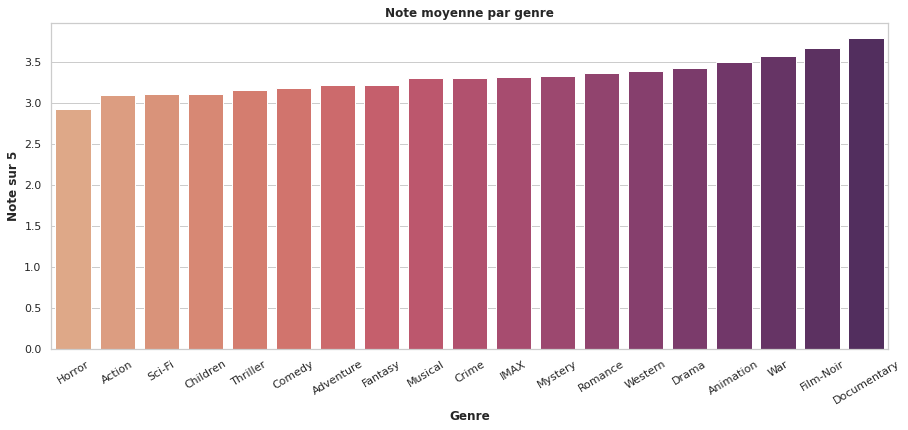

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
sns.barplot(x= rating_genre.index, y="rating", data=rating_genre, palette="flare" )

plt.xticks(rotation = 31, )
plt.title(label = 'Note moyenne par genre',fontweight='bold')
plt.ylabel(ylabel = 'Note sur 5', fontweight='bold')
plt.xlabel(xlabel = 'Genre', fontweight='bold')

#plt.show()
plt.savefig('viz2.png')


NUAGE DE MOTS AVEC TAGS

In [ ]:
tags = pd.read_csv('/home/jovyan/work/Data-big/tags.csv')
tags

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195
...,...,...,...,...
1108992,283206,73017,fun,1264379059
1108993,283206,73017,homoerotic subtext,1264379058
1108994,283206,73017,pacing,1264379058
1108995,283206,73017,plot,1264379058


In [ ]:
len(tags['movieId'].unique())

45981

In [ ]:
#merge avec movies

tags_movies = pd.merge(movies, tags, how = 'left' , left_on = 'movieId', right_on = 'movieId')
tags_movies

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,animated,1.514920e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,buddy movie,1.514920e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,Cartoon,1.514920e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,cgi,1.514920e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,comedy,1.514920e+09
...,...,...,...,...,...,...
871752,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
871753,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
871754,193585,Flint (2017),Drama,NaN,NaN,NaN
871755,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


In [ ]:
tags_movies.isna().sum()

movieId        0
title          0
genres         0
userId       173
tag          188
timestamp    173
dtype: int64

In [ ]:
tags_movies= tags_movies.dropna(axis = 0)
tags_movies

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,animated,1.514920e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,buddy movie,1.514920e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,Cartoon,1.514920e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,cgi,1.514920e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1040.0,comedy,1.514920e+09
...,...,...,...,...,...,...
871739,190213,John From (2015),Drama,159983.0,fantasy,1.530109e+09
871744,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,165704.0,anime,1.537099e+09
871745,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,165704.0,comedy,1.537099e+09
871746,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,165704.0,gintama,1.537099e+09


In [ ]:
tags_movies = tags_movies.drop(columns = ['genres', 'userId','timestamp'])
tags_movies

,movieId,title,tag
0,1,Toy Story (1995),animated
1,1,Toy Story (1995),buddy movie
2,1,Toy Story (1995),Cartoon
3,1,Toy Story (1995),cgi
4,1,Toy Story (1995),comedy
...,...,...,...
871739,190213,John From (2015),fantasy
871744,193565,Gintama: The Movie (2010),anime
871745,193565,Gintama: The Movie (2010),comedy
871746,193565,Gintama: The Movie (2010),gintama


In [ ]:
tags_movies.to_csv('tags_movies.csv')

In [ ]:
len(tags_movies['movieId'].unique())

#dans le dataset movies, il y a 9742 films. Or, dans le dataset tags, il n'y a des tags que pour 9569 films.

9569

In [ ]:
len(movies['movieId'].unique())

#on recupere bien des tags pour chaque film

9742

In [ ]:
liste_tags= list(tags_movies[tags_movies['movieId'] == 1]['tag'].unique())

In [ ]:
!pip install wordcloud==1.8.1

     |████████████████████████████████| 366 kB 14.3 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

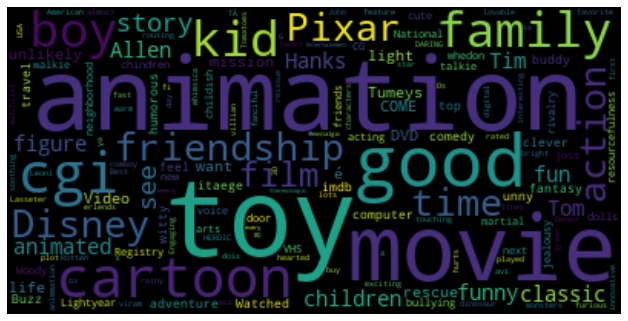

In [ ]:
text = str(liste_tags)
text = text.replace("'","")

wordcloud = WordCloud().generate(text)
plt.figure(figsize = (11,11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#fonction pour afficher le wordcloud du film donné en input

def wordcloud(movie):
    if movie not in tags_movies['title'].tolist():
        nowords = print('No tags found') 
        return nowords
    else:    
        movie_Id = int(tags_movies[tags_movies['title'] == movie]['movieId'].unique())
        liste_tags= list(tags_movies[tags_movies['movieId'] == movie_Id]['tag'].unique())
        
        text = str(liste_tags)
        text = text.replace("'","")

        wordcloud = WordCloud().generate(text)
        plt.figure(figsize = (11,11))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.margins(x=0, y=0)
        
        return plt.show()

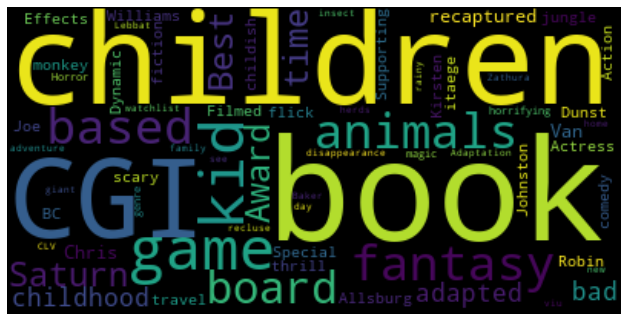

In [ ]:
wordcloud('Jumanji (1995)')